In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics
get_ipython().run_line_magic('matplotlib','inline')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv(r'/Users/gowriviswanath/Downloads/housing.csv')
df.dropna(inplace=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
X_values=df.drop(['median_house_value','ocean_proximity'],axis=1)
Y_values=df['median_house_value']
X_tr,X_te,Y_tr,Y_te=train_test_split(X_values,Y_values,test_size=0.15,random_state=0)
scaler=MinMaxScaler()
X_train=np.array(X_tr)
X_train_s=scaler.fit_transform(X_train)
X_test=np.array(X_te)
X_test_s=scaler.fit_transform(X_test)
Y_train = np.array(Y_tr)
Y_test = np.array(Y_te)
Y_test_s=np.array(Y_te)

In [10]:
def compute_cost(x,y,w,b):
    m=x.shape[0]
    cost=0.0
    for i in range(m):
        f=np.dot(x[i],w)+b
        cost+= (f-y[i])**2
    cost= cost/(2*m)
    return cost


In [11]:
def compute_gradient(x,y,w,b):
    
    m,n = x.shape
    
    dj_dw = np.zeros(n)
    dj_db = 0
    
    for i in range(m):
        
        err = (np.dot(x[i],w)+b)-y[i]
        
        for j in range(n):
            dj_dw[j] += err*x[i][j]
        
        dj_db += err
        
    dj_dw/=m
    dj_db/=m
    
    return dj_dw,dj_db

In [12]:
def gradient_descent(x, y, w, b ,compute_cost, compute_gradient, alpha, num_iters):
    
    J_history = []
    for i in range(num_iters): 
        dj_dw,dj_db = compute_gradient(x,y,w,b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        J_history.append(compute_cost(x,y,w,b))
        
        if i%100 == 0:
            print(f"Iteration Number : {i} , Cost : {J_history[-1]:8.6f}")
            
    return w,b,J_history

In [13]:
def predict(x,w,b):
    m,n = x.shape
    p = np.zeros(m)
    for i in range(m):
        p[i] = np.dot(x[i],w)+b
    
    return p

In [14]:
m,n = X_train.shape

w_in = np.random.randn(n)
b_in = 0.0

iterations = 2000
alpha = 0.002

w_final,b_final,J_history = gradient_descent(X_train_s,Y_train,w_in,b_in,compute_cost,compute_gradient,alpha,iterations)

Iteration Number : 0 , Cost : 27950262041.554695
Iteration Number : 100 , Cost : 17266129007.374012
Iteration Number : 200 , Cost : 11874557441.011189
Iteration Number : 300 , Cost : 9148041151.274475
Iteration Number : 400 , Cost : 7763551000.894887
Iteration Number : 500 , Cost : 7054901145.624222
Iteration Number : 600 , Cost : 6686646035.677817
Iteration Number : 700 , Cost : 6489877787.210409
Iteration Number : 800 , Cost : 6379545239.707981
Iteration Number : 900 , Cost : 6312821624.167917
Iteration Number : 1000 , Cost : 6268141436.405257
Iteration Number : 1100 , Cost : 6234644874.286851
Iteration Number : 1200 , Cost : 6206862795.169702
Iteration Number : 1300 , Cost : 6182040432.255125
Iteration Number : 1400 , Cost : 6158789805.115013
Iteration Number : 1500 , Cost : 6136411167.550109
Iteration Number : 1600 , Cost : 6114551335.800120
Iteration Number : 1700 , Cost : 6093031646.118170
Iteration Number : 1800 , Cost : 6071761325.824474
Iteration Number : 1900 , Cost : 6050693

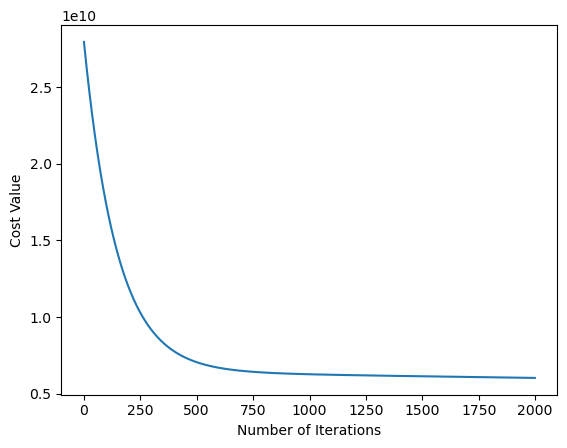

In [10]:
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Value")
plt.plot(J_history)


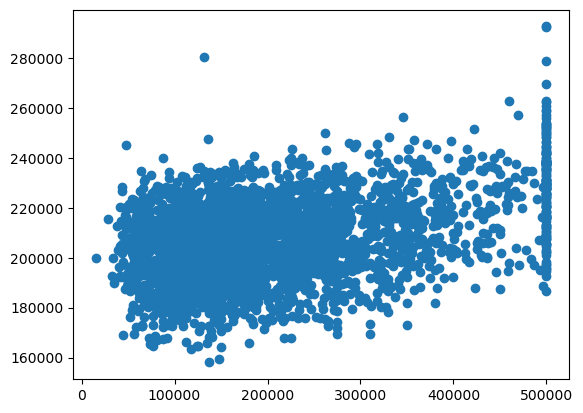

In [11]:
pred = predict(X_test_s,w_final,b_final)
plt.scatter(Y_test_s,pred)

In [12]:
print(w_final)
print(b_final)

[51229.30403413 26574.9785407  65696.06740654 11850.07130897
 12122.85561867  4660.68640518 12283.13356462 67609.1311657 ]
119646.26209540654
